# Flight look-to-book Data Preprocessing

#### @author glin
#### 15/06/2019

---
**Info**

This notebook contains 4 questions and corresponding solutions. <br />
Each solution is independent, meaning each can be run without running previous ones. This avoids inconvenience when kernel's dead. <br /> <br />


**Note** <br />
The current notebook "flight-look-to-book-preprocessing\_**v1**" is a clean version of solutions. <br />
To view the progress history, you can refer to "flight-look-to-book-preprocessing\_**v0**", or commit 2156fdea713bcd18ca35d6e48a795d9f38101166.

---

**Question 1**

Check the number of lines in each of the two files (bookings and searches)

In [1]:
import pandas as pd

In [2]:
# Use small dataset for exploring
bookingPath_small = '../data/sample/bookings.csv.small'
bookings_small = pd.read_csv(bookingPath_small, header=0, sep='^')

In [3]:
# Have a glance on bookings' dataset
bookings_small

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546
5,2013-03-20 00:00:00,1V,US,0283592e45e392871f7e14b1e22a9aaf,2d0f8e7e1bb792625d2f34f221bc38f1,d54708298686de200f8270e7c637af5e,2013-03-20 00:00:00,5923,0,DEN,...,DENLGA,FK,W,Y,2013-04-07 10:23:00,2013-04-07 16:14:24,1,2013,3,NULL
6,2013-03-20 00:00:00,1V,US,0283592e45e392871f7e14b1e22a9aaf,2d0f8e7e1bb792625d2f34f221bc38f1,d54708298686de200f8270e7c637af5e,2013-03-20 00:00:00,5923,0,DEN,...,LGADEN,FK,K,Y,2013-04-11 11:15:00,2013-04-11 13:06:24,1,2013,3,NULL
7,2013-03-25 00:00:00,1V,JP,5af045902bd23cab579915611d99e1e0,5073861d8597467c33596bfe16f23c56,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,...,NRTSIN,XR,Q,Y,2013-04-14 11:05:00,2013-04-14 17:10:56,2,2013,3,NULL
8,2013-03-25 00:00:00,1V,JP,5af045902bd23cab579915611d99e1e0,5073861d8597467c33596bfe16f23c56,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,...,SINPEN,WS,Y,Y,2013-04-16 15:45:00,2013-04-16 17:15:29,2,2013,3,NULL
9,2013-03-25 00:00:00,1V,JP,5af045902bd23cab579915611d99e1e0,5073861d8597467c33596bfe16f23c56,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,...,PENBKK,EQ,Y,Y,2013-04-18 08:00:00,2013-04-18 08:53:56,2,2013,3,NULL


In [4]:
bookings_small.columns

Index(['act_date           ', 'source', 'pos_ctry', 'pos_iata', 'pos_oid  ',
       'rloc          ', 'cre_date           ', 'duration', 'distance',
       'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry',
       'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry',
       'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry',
       'intl', 'route          ', 'carrier', 'bkg_class', 'cab_class',
       'brd_time           ', 'off_time           ', 'pax', 'year', 'month',
       'oid      '],
      dtype='object')

In [5]:
# Full dataset, but use some specific columns for now, due to memory issue
bookingsPath = '../../bookings.csv'
%time bookings = pd.read_csv(bookingsPath, header=0, sep='^', usecols=['arr_port','pax'])
len(bookings.index)

CPU times: user 23.2 s, sys: 1.78 s, total: 25 s
Wall time: 32.2 s


10000010

In [6]:
searchesPath_small = '../data/sample/searches.csv.small'
searches_small = pd.read_csv(searchesPath_small, header=0, sep='^')

In [7]:
searches_small

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL
5,2013-01-01,22:00:28,MPT,3561a60621de06ab1badc8ca55699ef3,US,IAH,BLR,1,2,IAH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
6,2013-01-01,10:47:14,MPT,d327ca6e35cc6732d4709828327ac7c1,DK,CPH,PAR,1,2,CPH,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CPH
7,2013-01-01,23:39:49,MPT,38a3abb0a28e3f00fa79a11f552a5052,FR,PAR,DUB,1,2,PAR,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR
8,2013-01-01,17:08:46,MPT,c8daef4f8bf73a61aa2c928705f7b82d,ES,DUS,ACE,1,2,DUS,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD
9,2013-01-01,19:57:57,MPT,28d7a8c95e4db88589d3d35b66920e78,DE,FRA,BGW,1,2,FRA,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BNJ


In [8]:
searches_small.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [9]:
# Full dataset, but use some specific columns for now, due to memory issue
searchesPath = '../../searches.csv'
%time searches = pd.read_csv(searchesPath, header=0, sep='^', usecols=['Destination', 'Date'])
len(searches.index)

CPU times: user 23 s, sys: 1.28 s, total: 24.3 s
Wall time: 29.8 s


20390198

In [10]:
# Release memory
del(searches)
del(bookings)

<br /> <br />**Solution to Question 1** <br /> <br />
Number of lines of bookings file: 10000010<br />
Number of lines of searches file: 20390198

<br /><br />########################################################<br /><br />

**Question 2**

The arrival airport is the column arr_port. It is the IATA code for the airport.

To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).

Print the top 10 arrival airports in the standard output, including the number of passengers.

Required: Get the name of the city or airport corresponding to that airport (programmatically, we suggest to have a look at GeoBases in Github)

If you’re using Python, can you solve this problem using pandas?

In [11]:
# Run this box as prerequisite to solution 2 (if wanted variables are polluted)
import pandas as pd

bookingPath_small = '../data/sample/bookings.csv.small'
bookings_small = pd.read_csv(bookingPath_small, header=0, sep='^')
bookingsPath = '../../bookings.csv'
bookings = pd.read_csv(bookingsPath, header=0, sep='^', usecols=['arr_port','pax'])

searchesPath_small = '../data/sample/searches.csv.small'
searches_small = pd.read_csv(searchesPath_small, header=0, sep='^')
searchesPath = '../../searches.csv'
searches = pd.read_csv(searchesPath, header=0, sep='^', usecols=['Destination', 'Date'])

In [12]:
# Necessary to strip as I discovered that bookings' columns contains white space in the end
bookings.columns = bookings.columns.str.strip()

In [13]:
pax_groupby_arr_port = bookings.groupby(['arr_port'])['pax'].sum()

In [14]:
pax_groupby_arr_port.index

Index(['AAB     ', 'AAE     ', 'AAL     ', 'AAN     ', 'AAQ     ', 'AAR     ',
       'ABA     ', 'ABB     ', 'ABE     ', 'ABI     ',
       ...
       'ZTH     ', 'ZUH     ', 'ZVE     ', 'ZVJ     ', 'ZVK     ', 'ZWE     ',
       'ZWS     ', 'ZYL     ', 'ZYN     ', 'ZYR     '],
      dtype='object', name='arr_port', length=2275)

In [15]:
pax_groupby_arr_port.index = pax_groupby_arr_port.index.str.strip()

In [16]:
df_pax_groupby_arr_port = pd.DataFrame({'arr_port':pax_groupby_arr_port.index, 'acc_pax':pax_groupby_arr_port.values})

In [17]:
df_pax_groupby_arr_port

,arr_port,acc_pax
0,AAB,30.0
1,AAE,810.0
2,AAL,810.0
3,AAN,20.0
4,AAQ,1650.0
5,AAR,500.0
6,ABA,90.0
7,ABB,40.0
8,ABE,880.0
9,ABI,150.0


In [18]:
# The dataset is taken from:
# https://github.com/opentraveldata/geobases/blob/public/GeoBases/DataSources/Airports/GeoNames/airports_geonames_only_clean.csv
# It provides the mapping between airport IATA codes and airport names
geo = pd.read_csv('../data/geobase/airports_geonames_only_clean.csv', sep='^', header=None).iloc[:,0:2]

In [19]:
geo

,0,1
0,AUH,Abu Dhabi International Airport
1,AZI,Abu Dhabi Bateen Airport
2,AAN,Al Ain International Airport
3,DXB,Dubai International Airport
4,FJR,Fujairah
5,RKT,Ras Al Khaimah International Airport
6,SHJ,Sharjah International Airport
7,KBL,Kabul International
8,FAH,Farah
9,FBD,Faizabad


In [20]:
geo.columns = ['arr_port', 'airport']

In [21]:
df_pax_groupby_arr_port_mapped = pd.merge(df_pax_groupby_arr_port, geo, on=['arr_port'])

In [22]:
df_pax_groupby_arr_port_mapped

,arr_port,acc_pax,airport
0,AAE,810.0,Annaba
1,AAL,810.0,Alborg
2,AAN,20.0,Al Ain International Airport
3,AAQ,1650.0,Anapa / Vitiazevo
4,AAR,500.0,Tirstrup
5,ABA,90.0,Abakan
6,ABE,880.0,Martin Airport
7,ABI,150.0,Abilene Regional Airport
8,ABJ,2600.0,Abidjan
9,ABK,0.0,Kabre Dare Military


In [23]:
df_pax_groupby_arr_port_mapped.sort_values(by=['acc_pax'], ascending=False).head(10)

,arr_port,acc_pax,airport
883,LHR,88809.0,London Heathrow Airport
960,MCO,70930.0,Orlando International Airport
853,LAX,70530.0,Los Angeles International Airport
851,LAS,69630.0,McCarran International Airport
728,JFK,66270.0,John F Kennedy International Airport
272,CDG,64490.0,Paris - Charles-de-Gaulle
190,BKK,59460.0,Suvarnabhumi
990,MIA,58150.0,Miami International Airport
1357,SFO,58000.0,San Francisco International Airport
438,DXB,55590.0,Dubai International Airport


In [24]:
# Release memory
del(searches)
del(bookings)
del(pax_groupby_arr_port)
del(df_pax_groupby_arr_port)
del(df_pax_groupby_arr_port_mapped)

<br /> <br />**Solution to question 2**<br /> <br />
The top 10 arrival airports are (or see above cell the output):

| Arrivial airport IATA code   |      Number of passengers      | Arrivial airport names|
|----------|-------------|------|
| LHR | 88809.0 | London Heathrow Airport |
| MCO | 70930.0 | Orlando International Airport  |
| LAX | 70530.0 | Los Angeles International Airport    |
| LAS | 69630.0 | McCarran International Airport |
| JFK | 66270.0 | John F Kennedy International Airport   |
| CDG | 64490.0 | Paris - Charles-de-Gaulle   |
| BKK | 59460.0 | Suvarnabhumi  |
| MIA | 58150.0 | Miami International Airport    |
| SFO | 58000.0 | San Francisco International Airport   |
| DXB | 55590.0 | Dubai International Airport |

<br /> <br />########################################################<br /> <br />

**Question 3**

Plot the monthly number of searches for flights arriving at Malaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. Plot a curve for Malaga, another one for Madrid, and another one for Barcelona, in the same figure.

If you’re using Python, can you solve this problem using pandas?

In [25]:
# Run this box as prerequisite to solution 3 (if wanted variables are polluted)
import pandas as pd

bookingPath_small = '../data/sample/bookings.csv.small'
bookings_small = pd.read_csv(bookingPath_small, header=0, sep='^')
bookingsPath = '../../bookings.csv'
bookings = pd.read_csv(bookingsPath, header=0, sep='^', usecols=['arr_port','pax'])

searchesPath_small = '../data/sample/searches.csv.small'
searches_small = pd.read_csv(searchesPath_small, header=0, sep='^')
searchesPath = '../../searches.csv'
searches = pd.read_csv(searchesPath, header=0, sep='^', usecols=['Destination', 'Date'])

In [26]:
sg = pd.merge(searches, geo, how='left', left_on=['Destination'], right_on=['arr_port'])

In [27]:
sg

,Date,Destination,arr_port,airport
0,2013-01-01,AUH,AUH,Abu Dhabi International Airport
1,2013-01-01,MIL,NaN,NaN
2,2013-01-01,SFO,SFO,San Francisco International Airport
3,2013-01-01,ARN,ARN,Arlanda
4,2013-01-01,MAD,MAD,Madrid / Barajas
5,2013-01-01,BLR,BLR,Bangalore / Hindustan
6,2013-01-01,PAR,NaN,NaN
7,2013-01-01,DUB,DUB,Dublin Airport
8,2013-01-01,ACE,ACE,Lanzarote / Aeropuerto
9,2013-01-01,BGW,NaN,NaN


In [28]:
mad = sg.loc[sg['airport'].str.contains('Madrid')==True]

In [29]:
mad

,Date,Destination,arr_port,airport
4,2013-01-01,MAD,MAD,Madrid / Barajas
151,2013-01-01,MAD,MAD,Madrid / Barajas
375,2013-01-01,MAD,MAD,Madrid / Barajas
406,2013-01-01,MAD,MAD,Madrid / Barajas
509,2013-01-01,MAD,MAD,Madrid / Barajas
606,2013-01-01,MAD,MAD,Madrid / Barajas
688,2013-01-01,MAD,MAD,Madrid / Barajas
791,2013-01-01,MAD,MAD,Madrid / Barajas
798,2013-01-01,MAD,MAD,Madrid / Barajas
895,2013-01-01,MAD,MAD,Madrid / Barajas


In [30]:
mad = mad.copy(deep=True)

In [31]:
mad["Date"] = pd.to_datetime(mad["Date"])

In [32]:
mad['Date']

4          2013-01-01
151        2013-01-01
375        2013-01-01
406        2013-01-01
509        2013-01-01
606        2013-01-01
688        2013-01-01
791        2013-01-01
798        2013-01-01
895        2013-01-01
897        2013-01-01
1026       2013-01-02
1038       2013-01-02
1061       2013-01-02
1117       2013-01-02
1233       2013-01-02
1407       2013-01-02
1584       2013-01-02
1619       2013-01-02
1700       2013-01-02
1715       2013-01-02
1790       2013-01-02
2162       2013-01-03
2280       2013-01-03
2813       2013-01-03
2856       2013-01-03
2963       2013-01-03
3077       2013-01-04
3113       2013-01-04
3118       2013-01-04
              ...    
20387892   2013-10-11
20387905   2013-10-11
20387947   2013-10-11
20387992   2013-10-11
20388011   2013-10-11
20388224   2013-10-11
20388230   2013-10-11
20388253   2013-10-11
20388305   2013-10-11
20388371   2013-10-12
20388383   2013-10-12
20388536   2013-10-12
20388553   2013-10-12
20388579   2013-10-12
20388662  

In [33]:
mad_to_month = mad.Date.dt.to_period("M")

In [34]:
mad_to_month

4           2013-01
151         2013-01
375         2013-01
406         2013-01
509         2013-01
606         2013-01
688         2013-01
791         2013-01
798         2013-01
895         2013-01
897         2013-01
1026        2013-01
1038        2013-01
1061        2013-01
1117        2013-01
1233        2013-01
1407        2013-01
1584        2013-01
1619        2013-01
1700        2013-01
1715        2013-01
1790        2013-01
2162        2013-01
2280        2013-01
2813        2013-01
2856        2013-01
2963        2013-01
3077        2013-01
3113        2013-01
3118        2013-01
             ...   
20387892    2013-10
20387905    2013-10
20387947    2013-10
20387992    2013-10
20388011    2013-10
20388224    2013-10
20388230    2013-10
20388253    2013-10
20388305    2013-10
20388371    2013-10
20388383    2013-10
20388536    2013-10
20388553    2013-10
20388579    2013-10
20388662    2013-10
20388758    2013-10
20388921    2013-10
20389019    2013-10
20389080    2013-10


In [35]:
monthly_mad = mad.groupby(mad_to_month).count()

In [36]:
monthly_mad

,Date,Destination,arr_port,airport
Date,,,,
2013-01,24258,24258,24258,24258
2013-02,22800,22800,22800,22800
2013-03,24681,24681,24681,24681
2013-04,25251,25251,25251,25251
2013-05,26334,26334,26334,26334
2013-06,22800,22800,22800,22800
2013-07,22971,22971,22971,22971
2013-08,21831,21831,21831,21831
2013-09,21147,21147,21147,21147


In [37]:
def monthly_agg(airport):
    df = sg.loc[sg['airport'].str.contains(airport)==True]
    df = df.copy(deep=True)
    df["Date"] = pd.to_datetime(df["Date"])
    per = df.Date.dt.to_period("M")
    monthly = df.groupby(per).count()
    return monthly['Date']

In [38]:
monthly_agp = monthly_agg('Malaga')
monthly_mad = monthly_agg('Madrid')
monthly_bcn = monthly_agg('Barcelona')

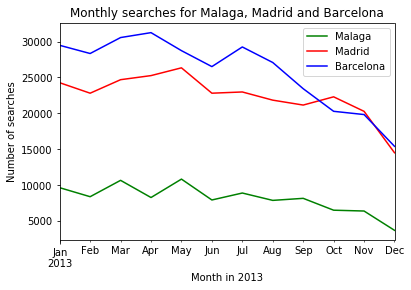

<Figure size 432x288 with 0 Axes>

In [42]:
# If you do not get the figure at the first time, try to run it again
import matplotlib.pyplot as plt

plt.title('Monthly searches for Malaga, Madrid and Barcelona')
monthly_agp.plot(color="green", label='Malaga')
monthly_mad.plot(color="red", label='Madrid')
monthly_bcn.plot(color="blue", label='Barcelona')
plt.xlabel('Month in 2013')
plt.ylabel('Number of searches')
plt.legend()
plt.show()
plt.savefig('monthly_searches_nb')

In [40]:
# Release memory
del(searches)
del(bookings)
del(mad)

<br /> <br />**Solution to question 3**<br /> <br />

See the above cell output

<br /><br />###############################################################<br /><br />

**Question 4**

Match searches with bookings.

For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). For instance, search and booking origin and destination should match. For the bookings file, origin and destination are the columns dep_port and arr_port, respectively. Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.

If you’re using Python, can you solve this problem using pandas?

<br /><br />**Note**

Solution to question 4 contains "**Explore**" section and **Clean code** section.

<br />**To run clean solution directly (recommended):**
1. Run prerequisite box below;
2. Jump to "**Clean code starts**" part, and run the cells to the end.

<br />"Prerequisite" box below should be run in either cases.

<br /><br />**Match criteria** in solution<br /><br />
In the solution, I consider searches' records match bookings' records when the following values match:<br />
searches: ['Seg1Date', 'Origin', 'Destination']<br />
bookings: ['brd_time', 'dep_port','arr_port']

e.g.
pd.merge(searches, bookings, how='left', left_on=['Seg1Date', 'Origin', 'Destination'], right_on=['brd_time', 'dep_port','arr_port'])

In [9]:
# Run this box as prerequisite to either "Explore" or "Clean code" section of solution 4
# (if wanted variables are polluted)
import pandas as pd

bookingPath_small = '../data/sample/bookings.csv.small'
bookings_small = pd.read_csv(bookingPath_small, header=0, sep='^')
bookings_small.columns = bookings_small.columns.str.strip()
bookingsPath = '../../bookings.csv'
bookings = pd.read_csv(bookingsPath, header=0, sep='^', usecols=['brd_time           ','dep_port','arr_port'])
bookings.columns = bookings.columns.str.strip()
bookings['brd_time'] = bookings['brd_time'].str.slice(0, 10)
# wasted lots of time due to space
bookings['dep_port'] = bookings['dep_port'].str.strip()
bookings['arr_port'] = bookings['arr_port'].str.strip()
grouped_booking = bookings.groupby(['brd_time','dep_port','arr_port']).count()
unique_bookings = pd.DataFrame({'brd_time':grouped_booking.index.get_level_values(0),'dep_port':grouped_booking.index.get_level_values(1),'arr_port':grouped_booking.index.get_level_values(2)})

searchesPath_small = '../data/sample/searches.csv.small'
searches_small = pd.read_csv(searchesPath_small, header=0, sep='^')

<br />**Explore starts (NOT recommended if memory not big enough).**<br /><br />

In [ ]:
# This step may fail due to memory issue depending on the hardware; unstable
# The alternative is shown in "Clean code" section, where chunk is used
searchesPath = '../../searches.csv'
searches = pd.read_csv(searchesPath, header=0, sep='^')

In [ ]:
searches_small.columns

In [ ]:
bookings_small.columns

In [ ]:
searches_small[['Date', 'Origin', 'Destination', 'RoundTrip',
                'Seg1Departure', 'Seg1Arrival', 'Seg1Date',
                'Seg2Departure', 'Seg2Arrival', 'Seg2Date',
                'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
                'Seg4Departure', 'Seg4Arrival', 'Seg4Date',
                'Seg5Departure', 'Seg5Arrival', 'Seg5Date',
                'Seg6Departure', 'Seg6Arrival', 'Seg6Date']]

In [ ]:
bookings_small[['cre_date', 'act_date', 'brd_time', 'off_time', 'dep_port', 'arr_port', 'lst_port', 'brd_port', 'off_port', 'mkt_port']]

In [ ]:
sb = pd.merge(searches, unique_bookings, how='left', left_on=['Seg1Date','Origin','Destination'], right_on=['brd_time','dep_port','arr_port'])

In [ ]:
sb

In [ ]:
sb = pd.merge(searches, unique_bookings, how='left', left_on=['Seg1Date', 'Origin', 'Destination'], right_on=['brd_time', 'dep_port','arr_port'])

In [ ]:
sb = pd.merge(searches, unique_bookings, how='left', left_on=['Seg1Date', 'Origin', 'Destination'], right_on=['brd_time', 'dep_port','arr_port'])

In [ ]:
sb.loc[sb['dep_port'].notnull()]

In [ ]:
pd.merge(searches, unique_bookings, how='left', left_on=['Seg1Date', 'Origin', 'Destination'], right_on=['brd_time', 'dep_port','arr_port'])

In [ ]:
# This step requires big memory, sometimes it can kill the kernel.
# If this step uses all columns instead of a few, it will very likely cause memory issue.
# An alternative is using chunk, shown in one of the cells below.
%time sb = pd.merge(searches, unique_bookings, how='left', left_on=['Seg1Date', 'Origin', 'Destination'], right_on=['brd_time', 'dep_port','arr_port'])

In [ ]:
sb.loc[sb['dep_port'].notnull()]

In [ ]:
sb = sb.loc[sb['dep_port'].notnull()]
sb = sb.loc[sb['arr_port'].notnull()]
sb = sb.loc[sb['brd_time'].notnull()]

In [ ]:
sb.shape

In [ ]:
searches.shape

In [ ]:
# Release memory
del(searches)

<br />**Explore ends.** <br />
**Clean code starts.** <br /><br />

In [10]:
def process_chunk(x):
    res = pd.merge(x, unique_bookings, how='left', left_on=['Seg1Date', 'Origin', 'Destination'], right_on=['brd_time', 'dep_port','arr_port'])
    res['IsBooked'] = 0
    res.loc[res['dep_port'].notnull(), 'IsBooked'] = 1
    res = res.drop(['brd_time','dep_port','arr_port'],axis=1)
    res.to_csv("res.csv",mode="a",header=False,index=False)

In [11]:
searchesPath = '../../searches.csv'
dataType = {'IsPublishedForNeg':object,'IsFromInternet':object,'IsFromVista':object,'InternetOffice':object}

In [12]:
cols=searches_small.columns.tolist()
cols.append('IsBooked')
init = pd.DataFrame(columns=cols)

In [13]:
init

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,IsBooked


In [17]:
init.to_csv("res.csv",mode="a",header=True,index=False)

In [18]:
searches_chunks = pd.read_csv(searchesPath, header=0, sep='^', dtype=dataType, chunksize=2000000) # chunksize depends with you colsize
%time [process_chunk(s) for s in searches_chunks]

CPU times: user 6min 27s, sys: 24.9 s, total: 6min 51s
Wall time: 6min 50s


[None, None, None, None, None, None, None, None, None, None, None]

In [19]:
dataType = {'IsPublishedForNeg':object,'IsFromInternet':object,'IsFromVista':object,'InternetOffice':object}
res_chunks = pd.read_csv('res.csv', header=0, sep=',', dtype=dataType, chunksize = 2000000)
[r.shape for r in res_chunks]

[(2000000, 46),
 (2000000, 46),
 (2000000, 46),
 (2000000, 46),
 (2000000, 46),
 (2000000, 46),
 (2000000, 46),
 (2000000, 46),
 (2000000, 46),
 (2000000, 46),
 (390198, 46)]

<br /> <br />**Solution to question 4**<br /> <br />   Saved as '**res.csv**' on disk